In [ ]:
import pandas as pd
import nltk
import string
import re
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read  csv datasets into data frames
dataFrame1 = pd.read_csv('drive/My Drive/NLP Project/Language Detection.csv')
dataFrame2 = pd.read_csv('drive/My Drive/NLP Project/hindi.csv')

In [ ]:
dataFrame1

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada


In [ ]:
dataFrame2

,Text,Language
0,चंद्रमोहन शर्मा को-प्रड्यूसर और लीड ऐक्टर अक्ष...,Hindi
1,अगर आप इस फिल्म को देखने जा रहे हैं तो सबसे पह...,Hindi
2,बॉलीवुड वाले चोरी-छिपे हॉलीवुड फिल्मों से कहान...,Hindi
3,"बैनर :\nसंजय दत्त प्रोडक्शन्स प्रा.लि., रुपाली...",Hindi
4,1959 में घटित चर्चित नानावटी कांड में एक क्राइ...,Hindi
...,...,...
713,31 अक्टूबर 1984 को काला दिवस कहा जाता है। इस द...,Hindi
714,\n\nगुंडे को देख सत्तर और अस्सी के दशक का सिने...,Hindi
715,Chandermohan.sharma@timesgroup.com ग्लैमर इंडस...,Hindi
716,"निर्माता :\nसुनीता गोवारीकर, अजय बिजली, संजीव ...",Hindi


In [ ]:
#Combine data frame 1 and 2 togeather
dataFrame = dataFrame1.append(dataFrame2,ignore_index = True)

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      11055 non-null  object
 1   Language  11055 non-null  object
dtypes: object(2)
memory usage: 172.9+ KB


In [ ]:
#Show/ print target value's no. of sentences: for each language, how many texts/ sentences are there in the dataframe ?
dataFrame.Language.value_counts()

English       1385
French        1014
Spanish        819
Hindi          781
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Name: Language, dtype: int64

In [ ]:
#Language is the target value name
#Print 2 text samples with target value Language is Russian
dataFrame[dataFrame.Language == 'Russian'].sample(2) 

,Text,Language
6393,"ну вы можете просто ответить, не могу жаловать...",Russian
6266,27 января 2013 года в «Циркуляре малых планет»...,Russian


In [ ]:
#Language is the target value name
#Print 2 text samples with target value Language is Malayalam
dataFrame[dataFrame.Language == 'Malayalam'].sample(2)

,Text,Language
1571,അപ്പോൾ 1959ൽ അദ്ദേഹം ഐ ബി എമ്മിൽ എഞ്ചിനിയർ ആയ...,Malayalam
1602,ലഭ്യമായ വിവരങ്ങളിലൂടെ ഗണിത സമവാക്യത്തിലെ ഗുണാങ...,Malayalam


In [ ]:
#Language is the target value name
#Print 2 text samples with target value Language is Arabic
dataFrame[dataFrame.Language == 'Arabic'].sample(2)

,Text,Language
9200,لا تنسى أن تقول ، من هو ذلك الرجل اللطيف الموج...,Arabic
9133,300 خادم في فلوريدا، 26 في أمستردام، و 23 في م...,Arabic


In [ ]:
#Language is the target value name
#Print 2 text samples with target value Language is Tamil
dataFrame[dataFrame.Language == 'Tamil'].sample(2)

,Text,Language
2236,"நான் கேட்கிறேன், பின்னர் நான் சொல்கிறேன்.",Tamil
2380,என்னால் மேலும் ஒப்புக்கொள்ள முடியவில்லை.,Tamil


In [ ]:
#Language is the target value name
#Print 2 text samples with target value Language is Kannada
dataFrame[dataFrame.Language == 'Kannada'].sample(2)

,Text,Language
10090,ಅಮೆರಿಕನ್ನರು ಬಳಸುವ ಮತ್ತೊಂದು ನುಡಿಗಟ್ಟು ಓಹ್ ಕೆಟ್ಟ...,Kannada
10275,ನಾನು ನಿಮ್ಮೊಂದಿಗೆ ಸರಿಯಾಗಿರುತ್ತೇನೆ.,Kannada


In [ ]:
#Language is the target value name
#Print 2 text samples with target value Language is Hindi
dataFrame[dataFrame.Language == 'Hindi'].sample(2)

,Text,Language
10515,दो दशक पूर्व सिल्वेस्टर स्टेलोन को एक्शन हीरो ...,Hindi
10921,'अज़हर' के शुरुआत में ही स्पष्ट कर दिया है कि ...,Hindi


In [ ]:
# Text Pre-processing

#Take the text and remove symbols and numbers specified in the function
def removeSymbolsAndNumbers(text):        
        text = re.sub(r'[{}]'.format(string.punctuation), '', text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[@]', '', text)

        return text.lower()

In [ ]:
#Take the text and remove english letters specified in the function
def removeEnglishLetters(text):        
        text = re.sub(r'[a-zA-Z]+', '', text)
        return text.lower()

In [ ]:
#Apply the function: removeEnglishLetters(Text) to the varibale x, if the variable x's target variable is Russian,or Malyalam, or Hindi,or Kannada,or Tamil, or Arabic:
X0 = dataFrame.apply(lambda x: removeEnglishLetters(x.Text) if x.Language in ['Russian','Malyalam','Hindi','Kannada','Tamil','Arabic']  else x.Text, axis = 1)
X0 #Show/ print

0         Nature, in the broadest sense, is the natural...
1        "Nature" can refer to the phenomena of the phy...
2        The study of nature is a large, if not the onl...
3        Although humans are part of nature, human acti...
4        [1] The word nature is borrowed from the Old F...
                               ...                        
11050    31 अक्टूबर 1984 को काला दिवस कहा जाता है। इस द...
11051    \n\nगुंडे को देख सत्तर और अस्सी के दशक का सिने...
11052    .@. ग्लैमर इंडस्ट्री में आर. बाल्की को बिग बी ...
11053    निर्माता :\nसुनीता गोवारीकर, अजय बिजली, संजीव ...
11054    फोर्स 2 उन अंडरकवर एजेंट्स को समर्पित है जो सम...
Length: 11055, dtype: object

In [ ]:
#Apply the function removeSymbolsAndNumbers to the same preproccessed data frame earlier:
X1 = X0.apply(removeSymbolsAndNumbers)
X1 #Show/ print

0         nature in the broadest sense is the natural p...
1        nature can refer to the phenomena of the physi...
2        the study of nature is a large if not the only...
3        although humans are part of nature human activ...
4         the word nature is borrowed from the old fren...
                               ...                        
11050     अक्टूबर  को काला दिवस कहा जाता है। इस दिन तत्...
11051    \n\nगुंडे को देख सत्तर और अस्सी के दशक का सिने...
11052     ग्लैमर इंडस्ट्री में आर बाल्की को बिग बी का ऐ...
11053    निर्माता \nसुनीता गोवारीकर अजय बिजली संजीव के ...
11054    फोर्स  उन अंडरकवर एजेंट्स को समर्पित है जो समय...
Length: 11055, dtype: object

In [ ]:
# y = target variable
y = dataFrame['Language']

In [ ]:
# Making the Model

In [ ]:
#With random_state = 42, we get the same train and test sets across different executions
x_train, x_test, y_train, y_test = train_test_split(X1,y, random_state=42)

In [ ]:
#TfidfVectorizer is a bag of words approach for feature extraction: ngram_range outputting one-word and three-word tokens, "char" to output character ngrams.
vectorizer = TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [ ]:
#Define a pipeline combining a text feature extractor: vectorizer with a simple classifier
model = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', LogisticRegression())
])

In [ ]:
model.fit(x_train,y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', LogisticRegression())])

In [ ]:
# Checking accuracy

In [ ]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)

In [ ]:
print("Accuracy is :",accuracy)

Accuracy is : 0.983357452966715


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Arabic       1.00      1.00      1.00       134
      Danish       0.97      0.93      0.95       109
       Dutch       0.97      0.95      0.96       139
     English       0.97      0.99      0.98       349
      French       0.99      0.99      0.99       267
      German       0.98      0.97      0.97       118
       Greek       1.00      1.00      1.00        95
       Hindi       1.00      1.00      1.00       190
     Italian       0.98      0.96      0.97       173
     Kannada       1.00      1.00      1.00        89
   Malayalam       1.00      0.99      1.00       156
  Portugeese       0.98      0.97      0.98       186
     Russian       1.00      1.00      1.00       162
     Spanish       0.96      0.98      0.97       193
    Sweedish       0.96      0.97      0.97       171
       Tamil       1.00      1.00      1.00       114
     Turkish       0.98      1.00      0.99       119

    accuracy              

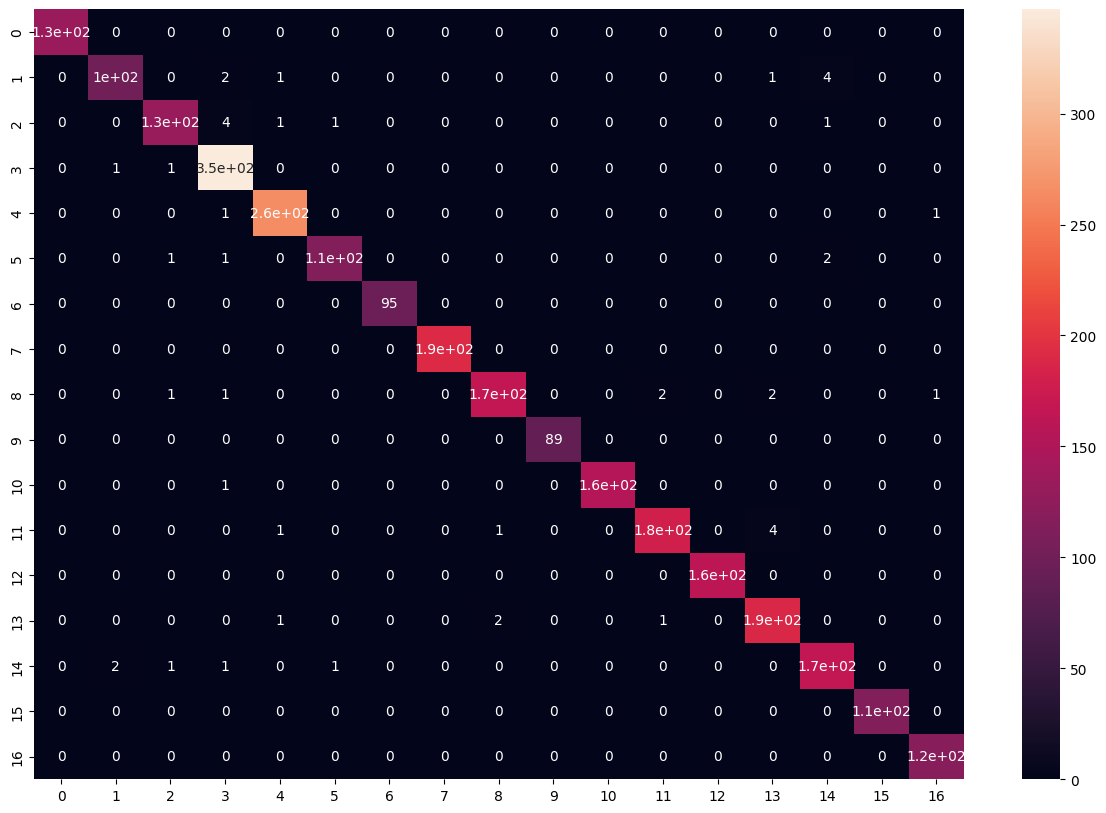

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
# Testing function

In [ ]:
def predict(text):
    lang = model.predict([text])
    print('The Language is in', lang[0])

In [ ]:
# Testing on various languages

In [ ]:
predict("LANGUAGE DETECTION MODEL CHECK")
predict("VÉRIFICATION DU MODÈLE DE DÉTECTION DE LA LANGUE")
predict("توففحص نموذج الكشف عن اللغة")
predict("VERIFICACIÓN DEL MODELO DE DETECCIÓN DE IDIOMAS")
predict("ലാംഗ്വേജ് ഡിറ്റക്ഷൻ മോഡൽ ചെക്ക്")
predict("ПРОВЕРКА МОДЕЛИ ОПРЕДЕЛЕНИЯ ЯЗЫКА")
predict('भाषा का पता लगाने वाले मॉडल की जांच')

# trying to fool the AI XD

predict(' boyit9h एनालिटिक्स alhgserog 90980879809 bguytfivb ahgseporiga प्रदान करता है')

The Language is in English
The Language is in French
The Language is in Arabic
The Language is in Spanish
The Language is in Malayalam
The Language is in Russian
The Language is in Hindi
The Language is in Hindi


In [ ]:
predict('السلام عليكم')

The Language is in Arabic


In [ ]:
# EXTRA POS

In [ ]:
#Create POS function
def posTagging(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    words = nltk.word_tokenize(text)
    return nltk.pos_tag(words)

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#Test the function
posTagging('Hello my name is Mari')

[('Hello', 'NNP'),
 ('my', 'PRP$'),
 ('name', 'NN'),
 ('is', 'VBZ'),
 ('Mari', 'NNP')]

In [ ]:
#Select the data rows where the language is english
text = dataFrame[dataFrame.Language == 'English']
text

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
...,...,...
1380,what your mistake was come let's feed you some...,English
1381,narcisa changed her ways she struggled at firs...,English
1382,how's narcissism now marian told them both eve...,English
1383,has she i guess she wouldn't want any more gol...,English


In [ ]:
#Remove the language column
text = text.drop(columns='Language')

In [ ]:
text

,Text
0,"Nature, in the broadest sense, is the natural..."
1,"""Nature"" can refer to the phenomena of the phy..."
2,"The study of nature is a large, if not the onl..."
3,"Although humans are part of nature, human acti..."
4,[1] The word nature is borrowed from the Old F...
...,...
1380,what your mistake was come let's feed you some...
1381,narcisa changed her ways she struggled at firs...
1382,how's narcissism now marian told them both eve...
1383,has she i guess she wouldn't want any more gol...


In [ ]:
#Select a row sample to perform the pos function
sample = text[28:29]
sample

,Text
28,Despite the wide regional variations in climat...


In [ ]:
#Perform pos
posTagging(str(sample))

[('Text', 'RB'),
 ('28', 'CD'),
 ('Despite', 'IN'),
 ('the', 'DT'),
 ('wide', 'JJ'),
 ('regional', 'JJ'),
 ('variations', 'NNS'),
 ('in', 'IN'),
 ('climat', 'NN')]